In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D        
from keras.layers import MaxPooling2D       
from keras.layers import Flatten            
from keras.layers import Dense 
from keras.layers import Dropout

from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing import image

from sklearn.model_selection import train_test_split

import numpy as np

In [2]:
#Definir rutas de las carétas que contienen las imágenes
data_dir = "../../imagenes2/mexh/"
img_width, img_height = 250, 250
input_shape = (img_width, img_height, 3)

In [3]:
#Hiperparámetros
epochs =20
batch_size = 10

In [4]:
#Generador de datos para procesamiento y aumento de datos
datagen = ImageDataGenerator(rescale=1. / 255)

In [5]:
#Obtener todas las imágenes y sus etiquetas
image_data = datagen.flow_from_directory(
    data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = "binary",
    classes = ["stn", "otras"] # clases correspondientes a las carpetas stn y otras
)

Found 4000 images belonging to 2 classes.


In [6]:
# Inicializar listas para almacenar todos los datos generados
all_X = []
all_y = []

In [7]:
# Iterar sobre el generador y recopilar todos los lotes de datos
for i in range(len(image_data)):
    batch_X, batch_y = image_data[i]
    all_X.append(batch_X)
    all_y.append(batch_y)

In [8]:
# Concatenar todos los lotes de datos en un solo conjunto
all_X = np.concatenate(all_X)
all_y = np.concatenate(all_y)

In [9]:
#Dividir los datos en conjuntos de entranamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    all_X, 
    all_y,
    test_size=0.3,
    random_state=42
)

In [10]:
X_train.shape

(2800, 250, 250, 3)

In [11]:
y_train.shape

(2800,)

In [12]:
X_test.shape

(1200, 250, 250, 3)

In [13]:
y_test.shape

(1200,)

In [14]:
#Definir el modelo CNN
clasificador = Sequential()

clasificador.add(Convolution2D(input_shape = input_shape,filters=16,kernel_size=(5,5),activation="relu"))
clasificador.add(MaxPooling2D(pool_size=(4,4)))
clasificador.add(Convolution2D(filters=32,kernel_size=(5,5),activation="relu"))
clasificador.add(MaxPooling2D(pool_size=(4,4)))

#Capa de aplanamiento
clasificador.add(Flatten())

#Se agregan las capas densas
clasificador.add(Dense(units=16, activation="relu"))
clasificador.add(Dropout(rate=0.5))

#Capa de salida
clasificador.add(Dense(units=1,activation="sigmoid"))

In [15]:
#Compilar el modelo
clasificador.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [16]:
#Entrenar el modelo
history = clasificador.fit(
    X_train,
    y_train,
    steps_per_epoch=32,
    epochs = epochs,
    validation_data = (X_test, y_test)
)

Epoch 1/20
32/32 [==============================] - 146s 4s/step - loss: 0.6816 - accuracy: 0.5557 - val_loss: 0.6620 - val_accuracy: 0.6700
Epoch 2/20
32/32 [==============================] - 154s 5s/step - loss: 0.6615 - accuracy: 0.6339 - val_loss: 0.6135 - val_accuracy: 0.6583
Epoch 3/20
32/32 [==============================] - 155s 5s/step - loss: 0.6008 - accuracy: 0.6707 - val_loss: 0.5613 - val_accuracy: 0.6983
Epoch 4/20
32/32 [==============================] - 155s 5s/step - loss: 0.5615 - accuracy: 0.6896 - val_loss: 0.5276 - val_accuracy: 0.7583
Epoch 5/20
32/32 [==============================] - 154s 5s/step - loss: 0.5344 - accuracy: 0.7268 - val_loss: 0.5320 - val_accuracy: 0.7200
Epoch 6/20
32/32 [==============================] - 153s 5s/step - loss: 0.5266 - accuracy: 0.7539 - val_loss: 0.5100 - val_accuracy: 0.7508
Epoch 7/20
32/32 [==============================] - 152s 5s/step - loss: 0.5037 - accuracy: 0.7625 - val_loss: 0.4998 - val_accuracy: 0.7775
Epoch 8/20
32

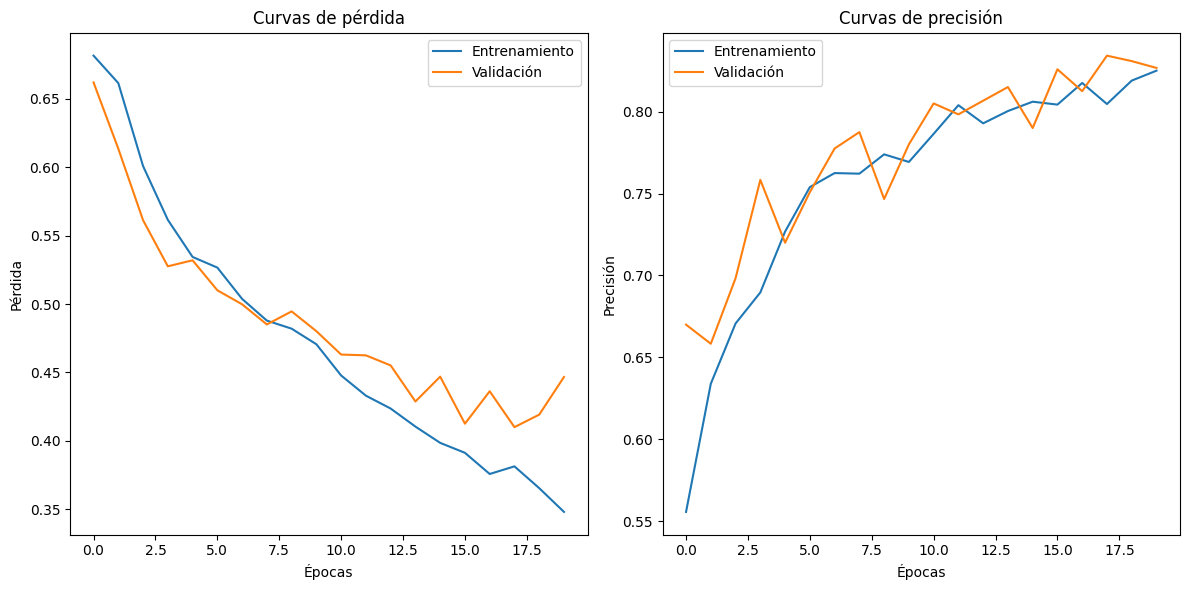

In [17]:
import matplotlib.pyplot as plt

# Graficar las curvas de pérdida y precisión durante el entrenamiento y la validación
plt.figure(figsize=(12, 6))

# Curvas de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Curvas de pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Curvas de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Curvas de precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()